# Trading Strategies powered by Machine Learning - Logistic Regression

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [3]:
import sys
sys.path.append('../../')

In [4]:
from util.load_data import *
from config.constants import *
from util.plot_equity import plot_equity_trades
from util.Save_result_return import save_to_csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [6]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [7]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

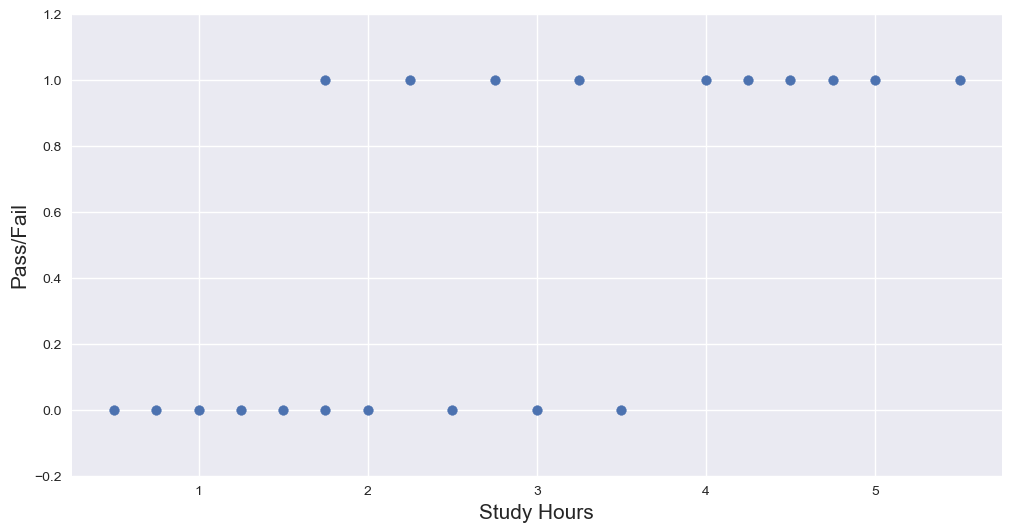

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [9]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [10]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression(fit_intercept= True)

In [13]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [14]:
lm.coef_

array([0.23459561])

In [15]:
lm.intercept_

-0.1539352689884873

In [16]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


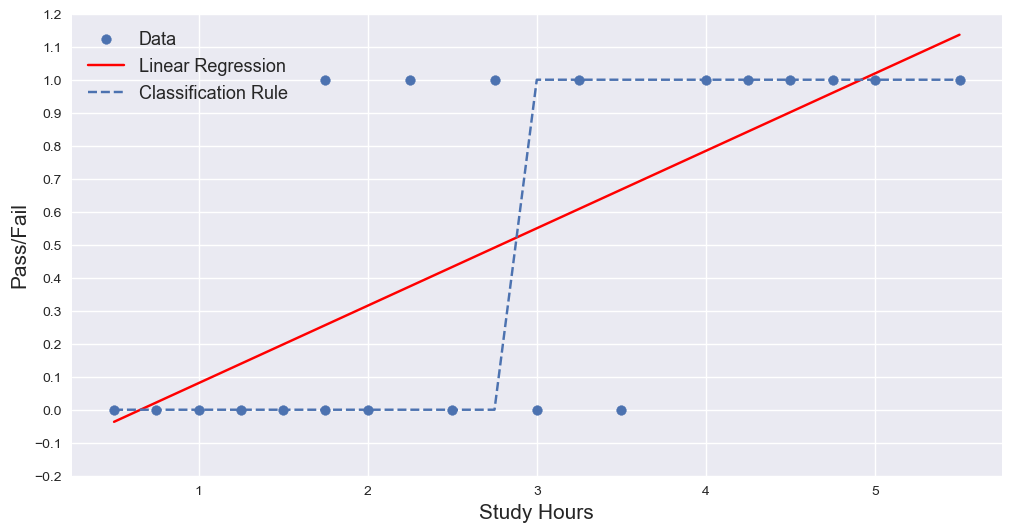

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lm = LogisticRegression()

In [20]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [21]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [22]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


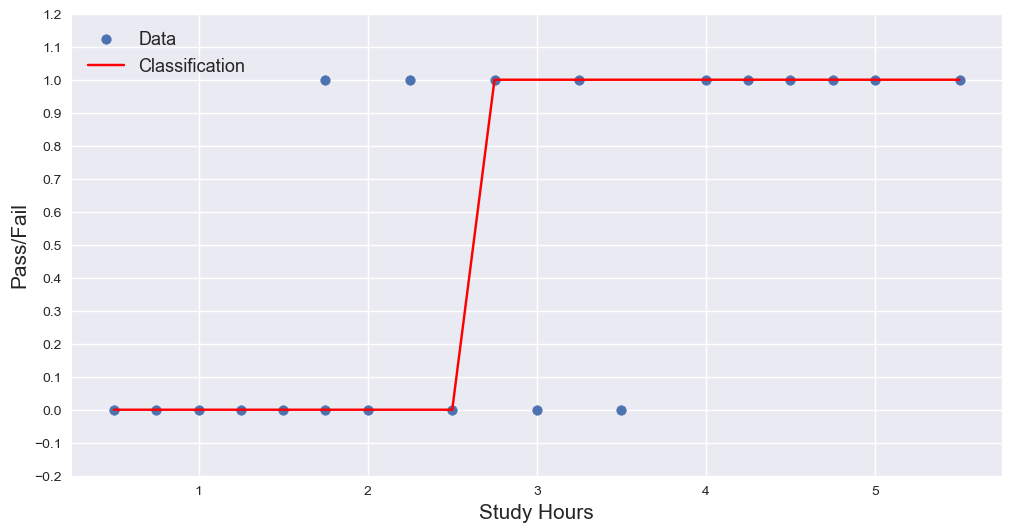

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [24]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

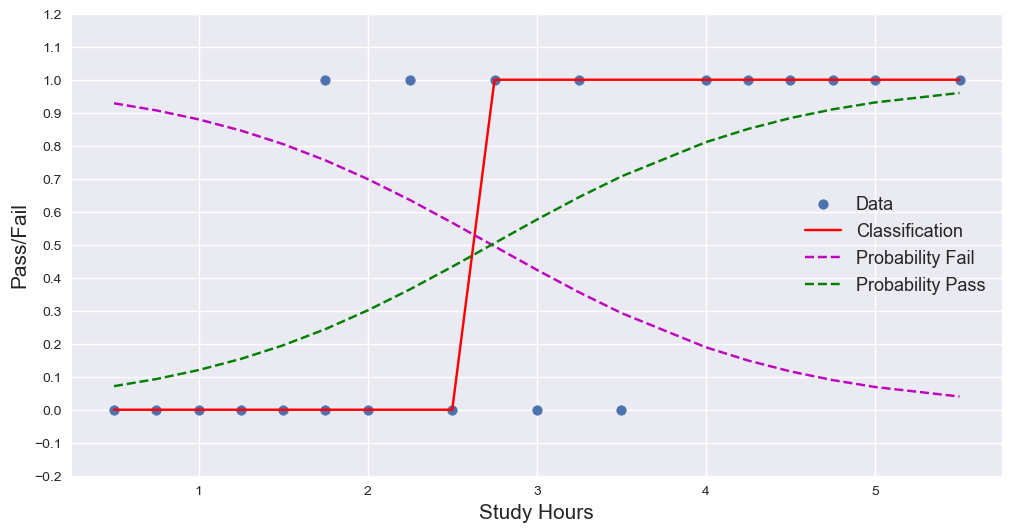

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Getting and Preparing the Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [27]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

FileNotFoundError: [Errno 2] No such file or directory: 'five_minute.csv'

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["direction"] = np.sign(data.returns)

In [ ]:
data

In [ ]:
data.direction.value_counts()

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

## Predicting Market Direction with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [ ]:
lm.fit(data[cols], data.direction)

In [ ]:
data["pred"] = lm.predict(data[cols])

In [ ]:
data

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.direction * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

## In-Sample Backtesting and the Look-ahead-bias

In [ ]:
data

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data

## Out-Sample Forward Testing

In [ ]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data["direction"] = np.sign(data.returns)

In [ ]:
data

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["pred"] = lm.predict(data[cols])

In [ ]:
data

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.direction * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data